In [4]:
!pip install contractions
!pip install nltk
!pip install pandas requests


## Dealing with shared files



1.  Go to the 'Shared with me' folder.
2.  Find the votes.tsv file.
3.  Right click on the file
4.  and select 'Add shortcut to Drive'.
5.  Choose 'My Drive' or any folder in 'My Drive' to create a shortcut to the file.








In [2]:

from google.colab import drive
drive.mount('/content/drive')
import os
path = os.path.join('/content/drive/MyDrive/')
path

Mounted at /content/drive


'/content/drive/MyDrive/'

##**READ VOTES.tsv File**##

In [5]:
#votes.tsv : https://drive.google.com/file/d/1JesG06eSXlBCnAVx7liCHREIsFm7bvni/view?usp=drive_link

#gridimage_text.tsv :    https://drive.google.com/file/d/1BjI1NI3Td63sqlBpHp80I1NTe58OpEqx/view?usp=drive_link



import pandas as pd
import requests
from io import StringIO

url = "https://drive.google.com/uc?id=1JesG06eSXlBCnAVx7liCHREIsFm7bvni"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text), sep='\t')


In [ ]:
# import pandas as pd


# df = pd.read_csv(path + 'votes.tsv', sep='\t')
# print(df.head(1))
# print(len(df))


In [6]:
null_rows = df[df['Geograph URI'].isnull()]
null_rows

,ID,Lat,Lon,Average,Variance,Votes,Geograph URI


In [7]:
df['gridimage_id'] = df['Geograph URI'].apply(lambda x: x.split('/')[-1])
print(df.head(5))

df.info()


   ID      Lat      Lon  Average  Variance              Votes  \
0   1  51.7026 -2.20985   4.1111    1.8765  4,5,3,5,1,4,4,5,6   
1   2  51.7026 -2.19538   4.0000    0.5000    4,4,3,5,4,3,5,4   
2   3  51.7116 -2.18094   4.2222    2.1728  5,4,6,5,3,4,1,4,6   
3   4  53.3110 -2.51786   3.8000    7.7600          2,4,1,9,3   
4   5  53.3021 -2.50274   4.1667    3.4722        8,4,2,4,3,4   

                          Geograph URI gridimage_id  
0   http://www.geograph.org.uk/photo/7            7  
1   http://www.geograph.org.uk/photo/8            8  
2  http://www.geograph.org.uk/photo/11           11  
3  http://www.geograph.org.uk/photo/20           20  
4  http://www.geograph.org.uk/photo/22           22  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212212 entries, 0 to 212211
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            212212 non-null  int64  
 1   Lat           212212 non-null  float64

In [8]:
df['gridimage_id'] = df['gridimage_id'].astype(int)
print(len(df))

212212


##**READ SCENICORNOT File** ##

In [9]:
## scenicornot csv file:  https://drive.google.com/file/d/1kpNNeOQhONxDZV57bCHVANTpLookqHoB/view?usp=sharing

url = "https://drive.google.com/uc?id=1kpNNeOQhONxDZV57bCHVANTpLookqHoB"
response = requests.get(url)
df_scenic = pd.read_csv(StringIO(response.text))


#df_scenic = pd.read_csv(path + 'scenicornot.metadata.csv')
print(df_scenic.info())
print(df_scenic.head(5))

num_rows = len(df_scenic)
print(f'The number of rows in the dataframe is {num_rows}.')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211856 entries, 0 to 211855
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   filename           211856 non-null  object 
 1   gridimage_id       211856 non-null  int64  
 2   realname           211856 non-null  object 
 3   title              211856 non-null  object 
 4   imagetaken         211856 non-null  object 
 5   user_id            211856 non-null  int64  
 6   moderation_status  211856 non-null  object 
 7   average            211856 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 12.9+ MB
None
                           filename  gridimage_id        realname  \
0  photos/00/00/000007_ce524193.jpg             7  Helena Downton   
1  photos/00/00/000008_e11bb647.jpg             8  Helena Downton   
2  photos/00/00/000011_deb640a8.jpg            11  Helena Downton   
3  photos/00/00/000020_782fd0d8.jpg            20     Pa

##**READ TEXT TSV** ##

In [12]:
#gridimage_text.tsv :    https://drive.google.com/file/d/1BjI1NI3Td63sqlBpHp80I1NTe58OpEqx/view?usp=drive_link



# url = "https://drive.google.com/uc?id=1BjI1NI3Td63sqlBpHp80I1NTe58OpEqx"
# response = requests.get(url)
# text_df = pd.read_csv(StringIO(response.text), sep='\t')


import pandas as pd
import requests
from io import StringIO

# Initial Google Drive URL
url = "https://drive.google.com/uc?id=1BjI1NI3Td63sqlBpHp80I1NTe58OpEqx"
session = requests.Session()
response = session.get(url)

# Check if we have the virus warning page
if "Google Drive can't scan this file for viruses." in response.text:
    # Extract confirmation token
    for line in response.text.splitlines():
        if "confirm=" in line:
            token = line.split("confirm=")[1].split("&")[0]
    # Append the token to the Google Drive URL
    url = f"{url}&confirm={token}"

    # Get the file content
    response = session.get(url, stream=True)

# Now you can read the content with pandas
text_df = pd.read_csv(StringIO(response.text), sep='\t')


#text_df = pd.read_csv(path + 'gridimage_text.tsv', sep='\t',encoding ='latin1')
text_df.head(1)



,gridimage_id,imageclass,comment,tags
0,4,Mansion,NaN,NaN


In [13]:
text_df = text_df.dropna(subset=['comment'])
text_df.head(5)



num_rows = len(text_df)
print(f'The number of rows in the dataframe is {num_rows}.')

The number of rows in the dataframe is 5031091.


##**MERGE votes and text dataframe**##

In [14]:
t_merge_df = df.merge(text_df, on='gridimage_id')
t_merge_df.head(5)

num_rows = len(t_merge_df)
print(f'The number of rows in the dataframe is {num_rows}.')

The number of rows in the dataframe is 158111.


In [15]:
t_merge_df['gridimage_id']

0              30
1              31
2              35
3              36
4              38
           ...   
158106    1157762
158107    1157770
158108    1157771
158109    1157772
158110    1157773
Name: gridimage_id, Length: 158111, dtype: int64

##**MERGE scenicornot_meta file with current dataframe**##

In [16]:
print(len(df_scenic))
print(len(t_merge_df))

211856
158111


In [17]:
merged_df = t_merge_df.merge(df_scenic, on='gridimage_id')
merged_df.head(1)


,ID,Lat,Lon,Average,Variance,Votes,Geograph URI,gridimage_id,imageclass,comment,tags,filename,realname,title,imagetaken,user_id,moderation_status,average
0,6,54.1311,-4.50266,7.5,2.75,"5,7,9,9",http://www.geograph.org.uk/photo/30,30,Coastline/Beaches,"Cliff scenery from the Marine Drive, south of ...",NaN,photos/00/00/000030_9cb04096.jpg,Andy Stephenson,Steeply folded rock strata,2005-02-00,11,accepted,7.5


In [18]:

num_rows = len(merged_df)
print(f'The number of rows in the merged_df :: dataframe is {num_rows}.')

The number of rows in the merged_df :: dataframe is 157991.


In [ ]:
#merged_df = test_merge_df.merge(text_df, on='gridimage_id')
#merged_df.head(1)


In [19]:


num_rows = len(merged_df)
print(f'The number of rows in the dataframe is {num_rows}.')

The number of rows in the dataframe is 157991.


##**TAGS AND COMMENTS AS SINGLE INPUT OR NOT**

Whether to consider 'tags' and 'comments' as separate inputs or a single input  depend on the nature of data

If 'tags' and 'comments' provide distinctly different types of information about the images, it might make sense to treat them as separate inputs. On the other hand, if they tend to provide similar information or if one simply elaborates on the other, it might make more sense to combine them into a single input.

For EDA, you can examine these factors:

Text Data:

Word Counts: Calculate the number of words in the 'tags' and 'comments' columns separately, and visualize their distributions. This can give you insights into whether they contain different types of information (short tags vs. long comments, for example).
Common Words: Identify common words in both 'tags' and 'comments'. If the common words in both columns are quite similar, it might be better to combine them.
Word Clouds: Create separate word clouds for 'tags' and 'comments'. This can give you a quick visual overview of the most common words in each.
Image Data:

Display Images: Try to display some random images from both the 'scenic' and 'not scenic' classes. This can give you some insights into whether 'tags' and 'comments' correspond to obvious visual features in the images.
Label Distribution: It is important to check if the labels are balanced or not. If not, you will need to decide how to handle the class imbalance. A simple bar plot can be used to visualize this.
Combined EDA:

Relationship between Text and Labels: Try to find if there is any relationship between the words used in 'tags' and 'comments' and the 'scenic'/'not scenic' labels. For instance, some words might be particularly associated with scenic images.

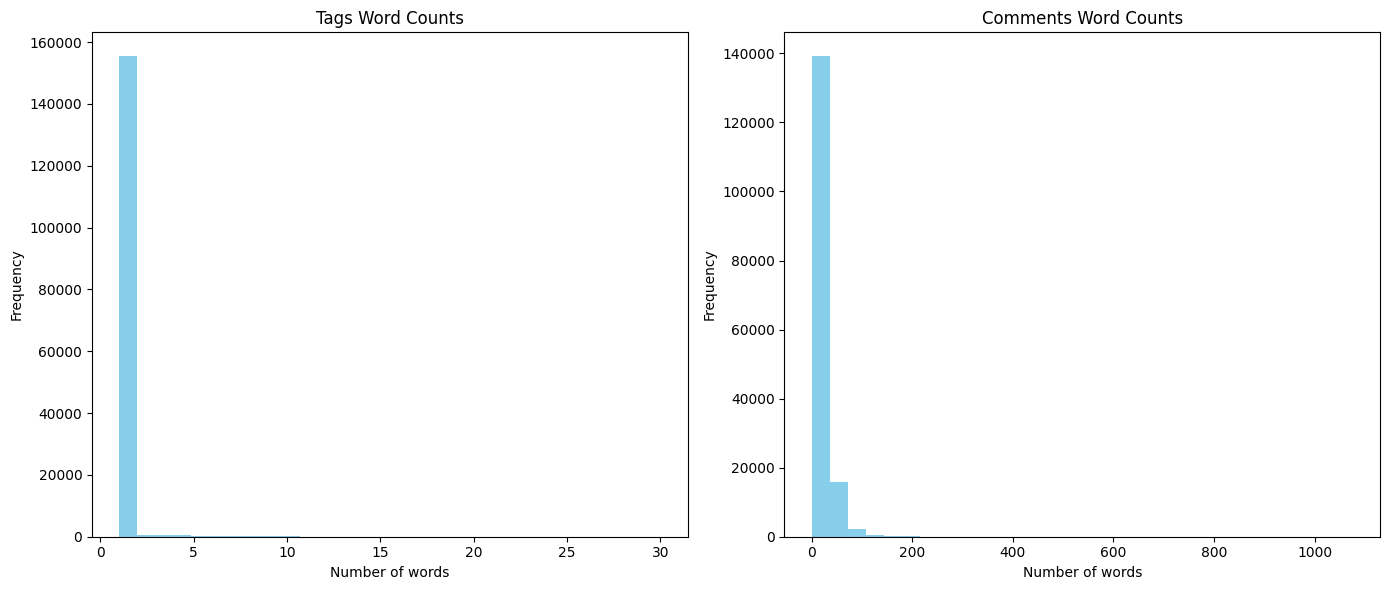

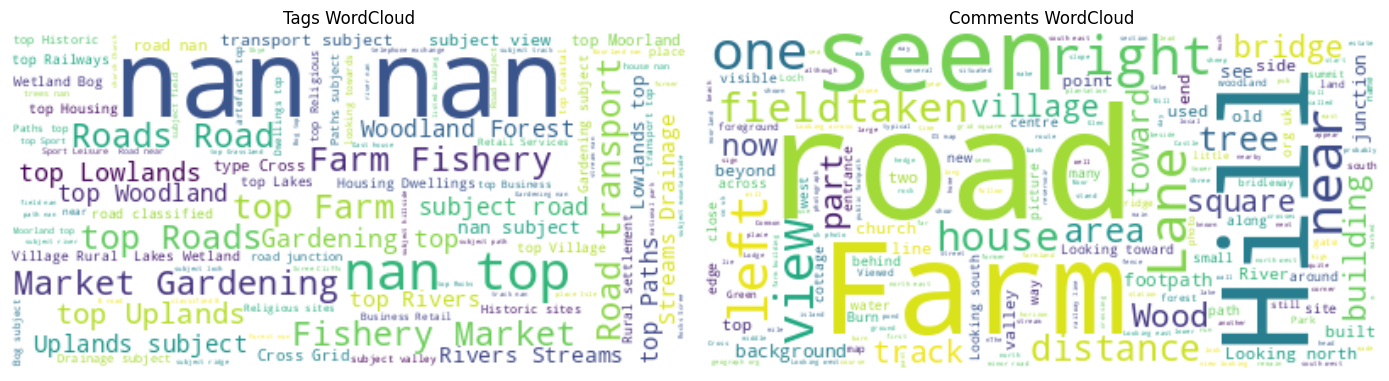

In [ ]:
#photos/15/04/150476_936a8c91.jpg

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word counts in 'tags' and 'comments'
merged_df['tags_word_count'] = merged_df['tags'].apply(lambda x: len(str(x).split()))
merged_df['comments_word_count'] = merged_df['comment'].apply(lambda x: len(str(x).split()))

# Histogram of word counts
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(merged_df['tags_word_count'], bins=30, color='skyblue')
plt.title('Tags Word Counts')
plt.xlabel('Number of words')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(merged_df['comments_word_count'], bins=30, color='skyblue')
plt.title('Comments Word Counts')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Word Clouds
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
tags_wordcloud = WordCloud(background_color='white').generate(' '.join(merged_df['tags'].astype(str)))
plt.imshow(tags_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tags WordCloud')

plt.subplot(1,2,2)
comments_wordcloud = WordCloud(background_color='white').generate(' '.join(merged_df['comment'].astype(str)))
plt.imshow(comments_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Comments WordCloud')
plt.tight_layout()
plt.show()



##**OBSERVATION**##

The 'comment' provides a descriptive account of what is in the image and even gives a contextual information such as where the photo was taken from.

On the other hand, 'tags' appear to be more like labels or categories related to the image content. They seem to represent high-level topics that describe the image, such as 'Energy infrastructure', 'Geological interest', 'Uplands', 'Water resources', etc. They can be considered as concise metadata about the image.

Given these observations, it makes sense to treat 'tags' and 'comments' as separate inputs to the model:

The 'tags' can be used to inform the model about the high-level topics related to the image, which can be useful for the model to form a broad understanding of the image content.

The 'comments', on the other hand, can provide more detailed and specific context to the model, which can be useful for the model to understand more nuanced aspects of the image content.

##**TEXT PREPROCESSING AND CLEANING**

In [20]:

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [21]:

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re
import unicodedata
from nltk.tokenize.toktok import ToktokTokenizer

from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
tokenizer = ToktokTokenizer()

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def simple_porter_stemming(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

def lemmatize_text(text):
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word

    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens

# Putting it all together in one function
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True,
                     text_stemming=False, text_lemmatization=True,
                     special_char_removal=True, remove_digits=True,
                     stopword_removal=True, repeated_char_removal=True):

    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # stem text
        if text_stemming:
            doc = simple_porter_stemming(doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits
        if special_char_removal:
            # insert spaces between special characters to isolate them
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc)
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc)
        # remove repeated characters
        if repeated_char_removal:
            tokens = tokenizer.tokenize(doc)
            doc = ' '.join(remove_repeated_characters(tokens))

        normalized_corpus.append(doc)

    return normalized_corpus

# Apply the normalize_corpus function to 'tags' and 'comments'
#merged_df['clean_tags'] = normalize_corpus(merged_df['tags'])
merged_df['clean_comments'] = normalize_corpus(merged_df['comment'])


<ipython-input-22-c9afaa82db5e>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-22-c9afaa82db5e>:9: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [23]:
print(merged_df.info())
#merged_df.loc[:,['comment','clean_comments', 'clean_tags']].head()
merged_df.loc[:,['comment','clean_comments']].head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 157991 entries, 0 to 157990
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 157991 non-null  int64  
 1   Lat                157991 non-null  float64
 2   Lon                157991 non-null  float64
 3   Average            157991 non-null  float64
 4   Variance           157991 non-null  float64
 5   Votes              157991 non-null  object 
 6   Geograph URI       157991 non-null  object 
 7   gridimage_id       157991 non-null  int64  
 8   imageclass         157964 non-null  object 
 9   comment            157991 non-null  object 
 10  tags               3511 non-null    object 
 11  filename           157991 non-null  object 
 12  realname           157991 non-null  object 
 13  title              157991 non-null  object 
 14  imagetaken         157991 non-null  object 
 15  user_id            157991 non-null  int64  
 16  mo

,comment,clean_comments
0,"Cliff scenery from the Marine Drive, south of ...",cliff scenery marine drive south douglas iom
1,"The new gas power station. Douglas, IOM. Feb 2...",new gas power station douglas iom feb 205
2,"Looking NE from an altitude of about 470m, al...",looking ne altitude 470m along north barule ri...
3,"From point 550m on the ridge, looking ENE.",point 50m ridge looking ene
4,Looking across the saddle from point 533m. Feb...,looking across saddle point 53m feb 205 lake d...


##**Most relevant EDA for our objective:**

**Top words analysis:** Identifying the most frequent words in the 'scenic' and 'not scenic' classes could give you some insights into what kind of words are associated with each category.

**Word Clouds:** Similarly, word clouds for each class can visually represent these differences.

**N-gram analysis:** This can give you an idea if there are common phrases that are particularly indicative of the 'scenic' category.

Correlation between words/text length and target variable: It might be useful to check if the presence of certain words or the length of the text description can predict the 'scenic' categor

In [24]:
#merged_df = merged_df.drop(columns=['clean_comment2', 'clean_comment'])

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157991 entries, 0 to 157990
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 157991 non-null  int64  
 1   Lat                157991 non-null  float64
 2   Lon                157991 non-null  float64
 3   Average            157991 non-null  float64
 4   Variance           157991 non-null  float64
 5   Votes              157991 non-null  object 
 6   Geograph URI       157991 non-null  object 
 7   gridimage_id       157991 non-null  int64  
 8   imageclass         157964 non-null  object 
 9   comment            157991 non-null  object 
 10  tags               3511 non-null    object 
 11  filename           157991 non-null  object 
 12  realname           157991 non-null  object 
 13  title              157991 non-null  object 
 14  imagetaken         157991 non-null  object 
 15  user_id            157991 non-null  int64  
 16  mo

##**Scenic or not FLAG**
In this data frame we have a field called average which shows total votes. Now for our task if average votes is greater than 6 we consider it scenicn
so first thing is to add a column scenic with values 0 or 1 based on the average value if greater than 6.5 we say 1 otherwise 0

###**The threshold value for variance**##

To determine the threshold value of variance in our case highly subjective

From a statistical point of view, variance measures how far a set of numbers is spread out from their average value. A high variance implies that the votes are very spread out around the mean and that there isn't a clear consensus among voters. A low variance implies that most votes are close to the mean, indicating a general consensus.

However, deciding on a threshold value isn't straightforward and may not be directly related to human psychology. We will need to experiment with different threshold values and potentially use techniques such as cross-validation to determine the threshold that provides the best performance for our model.

Our first step is to analyze the data to see the distribution of variance.
which could help us to understand a sensible threshold. e.g if 95% of our images have a variance less than 2.5, then setting a threshold at or around this value could potentially be a reasonable starting point.

Selecting a chosen threshold will heavily impact the model's performance and interpretability.
That is why this note is very important that we are selecting variance threshold.

##**Analyze the data**##

In [ ]:
print(merged_df['Variance'].describe())


count    157991.000000
mean          2.769065
std           1.910319
min           0.000000
25%           1.359400
50%           2.408200
75%           3.760000
max          20.250000
Name: Variance, dtype: float64


##**IMPORTANT NOTES**##

The variance here is a measure of the variability in votes for each image\
 A high variance means that the votes for an image were spread out\
(people disagreed more), and a low variance means votes were close to each other (people agreed more).








$
S =
\begin{cases}
1 & \text{if } A > 6 \text{ and } V < T \\
0 & \text{if } A < 4 \text{ and } V < T \\
2 & \text{otherwise}
\end{cases}
$


In [25]:
#merged_df['scenic'] = (merged_df['average'] > 6.5).astype(int)

threshold_value = 4 # increase this value

## increase the average 6 and 7
## few comments with 6 and 5


def calculate_scenic(row):
    average = row['average']
    variance = row['Variance']

    if average > 6 and variance < threshold_value:
        return 1
    elif average < 4 and variance < threshold_value:
        return 0
    else:
        return 2

merged_df['scenic'] = merged_df.apply(calculate_scenic, axis=1)



In [26]:
print(merged_df['tags'])
#print(merged_df['clean_tags'])

# task 1



#top:
#? to space

# 3507    top:Air, Sky, Weather?top:Park and Public Gard...
# 3507    top:air sky weather top:park public gardenscentena...

# task 2

# show images from drive




0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
157986    NaN
157987    NaN
157988    NaN
157989    NaN
157990    NaN
Name: tags, Length: 157991, dtype: object


In [27]:
merged_df['scenic'].value_counts()


2    84036
0    54694
1    19261
Name: scenic, dtype: int64

In [28]:
# Display some rows where 'scenic' is 1
print(merged_df[merged_df['scenic'] == 1].head())

# Display some rows where 'scenic' is 0
print(merged_df[merged_df['scenic'] == 0].head())


    ID      Lat      Lon  Average  Variance                Votes  \
0    6  54.1311 -4.50266   7.5000    2.7500              5,7,9,9   
2    8  54.2764 -4.43464   8.5000    3.0000  6,10,10,10,10,6,7,9   
3    9  54.2857 -4.41982   6.5714    3.3878        8,3,8,5,8,6,8   
55  65  56.0196 -6.25302   7.3333    2.8889                9,5,8   
57  70  51.5613 -3.24798   6.7500    1.6875      4,7,7,7,6,9,7,7   

                            Geograph URI  gridimage_id         imageclass  \
0    http://www.geograph.org.uk/photo/30            30  Coastline/Beaches   
2    http://www.geograph.org.uk/photo/35            35           Moorland   
3    http://www.geograph.org.uk/photo/36            36               Hill   
55  http://www.geograph.org.uk/photo/540           540   Open countryside   
57  http://www.geograph.org.uk/photo/584           584          Mountains   

                                              comment tags  \
0   Cliff scenery from the Marine Drive, south of ...  NaN   
2   

##**TEXT PROCESSING**##

Before proceeding to the modeling phase, we want to consider text vectorization - transforming our preprocessed text into numerical vectors that machine learning models can understand. The choice of vectorization method often depends on the model and the nature of our task. In our case, since we're using ViLBERT (a BERT variant), we'll be using BERT's specific tokenizer and WordPiece vocabulary to convert  text into vectors. This step would normally be performed as part of our model training pipeline.

Please note that BERT tokenization takes into account the context of words for better understanding of semantic meanings, Furthermore, BERT handles its own text preprocessing (like lower-casing and special character handling), so sometimes, extensive preprocessing before feeding into BERT might not be necessary

In [29]:
merged_df['filename']



0                photos/00/00/000030_9cb04096.jpg
1                photos/00/00/000031_544c0cc1.jpg
2                photos/00/00/000035_5911dd65.jpg
3                photos/00/00/000036_1fc415fa.jpg
4                photos/00/00/000038_2f1fbb61.jpg
                           ...                   
157986    geophotos/01/15/77/1157762_8fadbcf0.jpg
157987    geophotos/01/15/77/1157770_e2ac9103.jpg
157988    geophotos/01/15/77/1157771_9e442952.jpg
157989    geophotos/01/15/77/1157772_4d4ad642.jpg
157990    geophotos/01/15/77/1157773_512dfc13.jpg
Name: filename, Length: 157991, dtype: object

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image

# select a filename

filename = merged_df['filename'].iloc[0]  # replace 0 with the index of the image you want
full_path = os.path.join(path, filename)
image = Image.open(full_path)
image.show()

full_path




'/content/drive/MyDrive/photos/00/00/000030_9cb04096.jpg'

##**DIVIDE in train and test randomaly**##


In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157991 entries, 0 to 157990
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 157991 non-null  int64  
 1   Lat                157991 non-null  float64
 2   Lon                157991 non-null  float64
 3   Average            157991 non-null  float64
 4   Variance           157991 non-null  float64
 5   Votes              157991 non-null  object 
 6   Geograph URI       157991 non-null  object 
 7   gridimage_id       157991 non-null  int64  
 8   imageclass         157964 non-null  object 
 9   comment            157991 non-null  object 
 10  tags               3511 non-null    object 
 11  filename           157991 non-null  object 
 12  realname           157991 non-null  object 
 13  title              157991 non-null  object 
 14  imagetaken         157991 non-null  object 
 15  user_id            157991 non-null  int64  
 16  mo

In [31]:
import pandas as pd
import random

# Create a new DataFrame with only the entries for scenic=0 or 1.
df = merged_df[merged_df["scenic"].isin([0, 1])]

# Split the DataFrame into train and test sets using a random split.
split = int(0.8 * len(df))
train_df = df[:split]
test_df = df[split:]

# Save the train and test sets to separate files.
train_file =  os.path.join(path, 'train.csv')
test_file =  os.path.join(path, 'test.csv')


train_df.to_csv(train_file)

test_df.to_csv(test_file)




In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157991 entries, 0 to 157990
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   157991 non-null  int64  
 1   Lat                  157991 non-null  float64
 2   Lon                  157991 non-null  float64
 3   Average              157991 non-null  float64
 4   Variance             157991 non-null  float64
 5   Votes                157991 non-null  object 
 6   Geograph URI         157991 non-null  object 
 7   gridimage_id         157991 non-null  int64  
 8   imageclass           157964 non-null  object 
 9   comment              157991 non-null  object 
 10  tags                 3511 non-null    object 
 11  filename             157991 non-null  object 
 12  realname             157991 non-null  object 
 13  title                157991 non-null  object 
 14  imagetaken           157991 non-null  object 
 15  user_id          

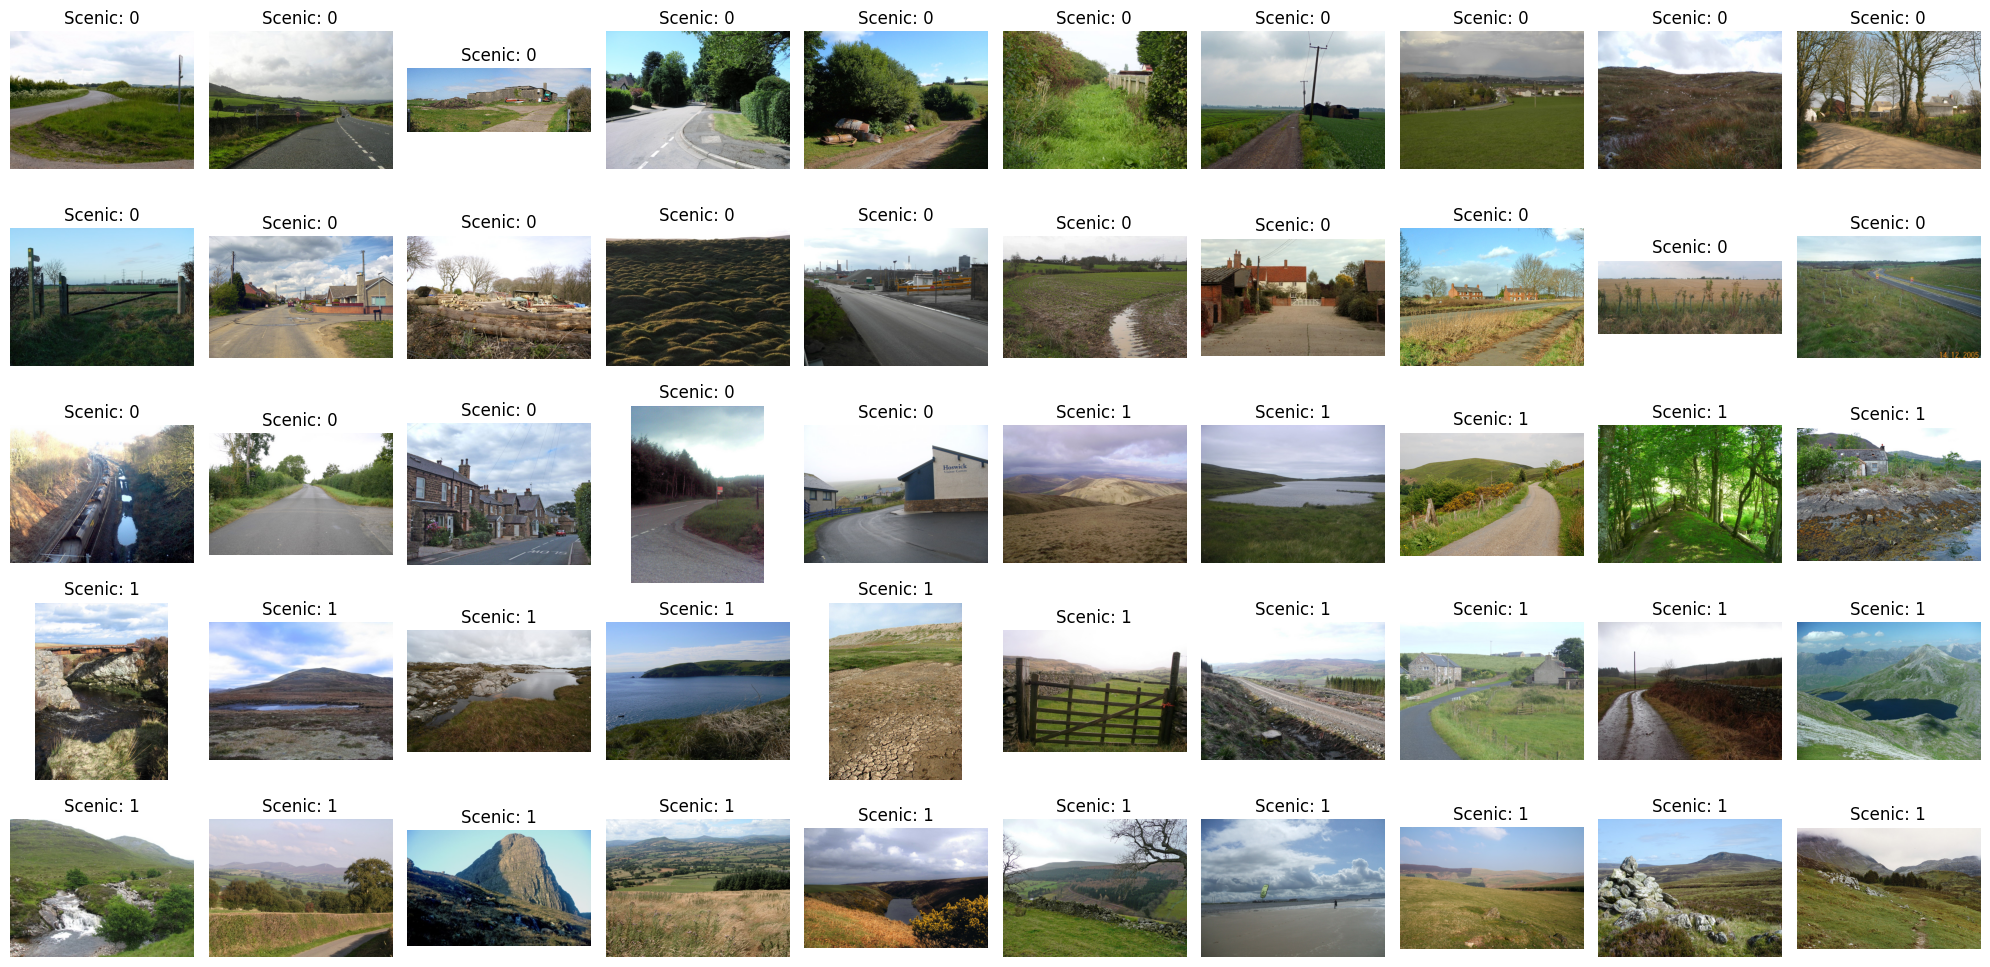

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


# Assuming train_df is your DataFrame
sample_df = train_df.groupby('scenic').apply(lambda x: x.sample(n=25))


# Set the overall layout for your subplots (5 rows and 10 columns)
fig, axs = plt.subplots(5, 10, figsize=(20, 10))

# Loop over your dataframe
for i, (index, row) in enumerate(sample_df.iterrows()):
    # Build the full filepath
    full_path = os.path.join(path, row['filename'])

    # Load the image
    img = mpimg.imread(full_path)

    # Plot the image and the scenic attribute
    ax = axs[i // 10, i % 10]
    ax.imshow(img)
    ax.axis('off')  # hide the axes
    ax.set_title('Scenic: ' + str(row['scenic']))

# If less than 50 plots, remove the empty ones
if i < 49:
    for j in range(i+1, 50):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()


In [36]:
import os
import pandas as pd

# Your dataframe and path
# merged_df = ...

# Filter the dataframe
scenic_df = merged_df[merged_df['scenic'] == 1]
not_scenic_df = merged_df[merged_df['scenic'] == 0]

# Randomly shuffle the dataframes
shuffled_scenic = scenic_df.sample(frac=1, random_state=42)
shuffled_not_scenic = not_scenic_df.sample(frac=1, random_state=42)

def get_accessible_images(df, path, target_count):
    accessible_images = []
    for _, row in df.iterrows():
        full_path = os.path.join(path, row['filename'])
        if os.path.exists(full_path):
            accessible_images.append(row)
            if len(accessible_images) == target_count:
                break
    return accessible_images

# Get 5000 accessible images for each category
accessible_scenic_rows = get_accessible_images(shuffled_scenic, path, 5000)
accessible_not_scenic_rows = get_accessible_images(shuffled_not_scenic, path, 5000)

# Convert lists of rows back to dataframes
accessible_scenic_df = pd.DataFrame(accessible_scenic_rows)
accessible_not_scenic_df = pd.DataFrame(accessible_not_scenic_rows)

# Concatenate the samples
sample_df = pd.concat([accessible_scenic_df, accessible_not_scenic_df])

# Save the resulting dataframe (assuming you want it as a CSV)
sample_df.to_csv("sample_df.csv", index=False)
